In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
application = pd.read_csv('../data/application_record.csv')
credit = pd.read_csv('../data/credit_record.csv')

In [396]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [397]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


### 데이터 수 확인하기

In [398]:
print('application :', len(application['ID']))
print('credit :',len(credit['ID']))
print('intersection :',len(set(application['ID']).intersection(set(credit['ID']))))

application : 438557
credit : 1048575
intersection : 36457


### application Columns명 변경하기

In [399]:
application.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Car', 'FLAG_OWN_REALTY': 'Reality',
                                'CNT_CHILDREN': 'ChildNo', 'AMT_INCOME_TOTAL': 'Income',
                                'NAME_EDUCATION_TYPE': 'Edutype', 'NAME_FAMILY_STATUS': 'FamilyType',
                                'NAME_HOUSING_TYPE': 'HouseType', 'FLAG_EMAIL': 'Email',
                                'NAME_INCOME_TYPE': 'IncomeType', 'FLAG_WORK_PHONE': 'Wkphone',
                                'FLAG_PHONE': 'Phone', 'CNT_FAM_MEMBERS': 'FamilySize',
                                'OCCUPATION_TYPE': 'Occupy'}, inplace=True)

### application 데이터 살펴보기

In [401]:
application_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90085 entries, 0 to 438553
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             90085 non-null  int64  
 1   Gender         90085 non-null  object 
 2   Car            90085 non-null  object 
 3   Reality        90085 non-null  object 
 4   ChildNo        90085 non-null  int64  
 5   Income         90085 non-null  float64
 6   IncomeType     90085 non-null  object 
 7   Edutype        90085 non-null  object 
 8   FamilyType     90085 non-null  object 
 9   HouseType      90085 non-null  object 
 10  DAYS_BIRTH     90085 non-null  int64  
 11  DAYS_EMPLOYED  90085 non-null  int64  
 12  FLAG_MOBIL     90085 non-null  int64  
 13  Wkphone        90085 non-null  int64  
 14  Phone          90085 non-null  int64  
 15  Email          90085 non-null  int64  
 16  Occupy         62608 non-null  object 
 17  FamilySize     90085 non-null  float64
dtypes: float64

In [402]:
print('application :', len(application['ID']))
print('credit :',len(credit['ID']))
print('intersection :',len(set(application_unique['ID']).intersection(set(credit['ID']))))

application : 438557
credit : 1048575
intersection : 9709


In [403]:
application.head()

,ID,Gender,Car,Reality,ChildNo,Income,IncomeType,Edutype,FamilyType,HouseType,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,Wkphone,Phone,Email,Occupy,FamilySize
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [404]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             438557 non-null  int64  
 1   Gender         438557 non-null  object 
 2   Car            438557 non-null  object 
 3   Reality        438557 non-null  object 
 4   ChildNo        438557 non-null  int64  
 5   Income         438557 non-null  float64
 6   IncomeType     438557 non-null  object 
 7   Edutype        438557 non-null  object 
 8   FamilyType     438557 non-null  object 
 9   HouseType      438557 non-null  object 
 10  DAYS_BIRTH     438557 non-null  int64  
 11  DAYS_EMPLOYED  438557 non-null  int64  
 12  FLAG_MOBIL     438557 non-null  int64  
 13  Wkphone        438557 non-null  int64  
 14  Phone          438557 non-null  int64  
 15  Email          438557 non-null  int64  
 16  Occupy         304354 non-null  object 
 17  FamilySize     438557 non-nul

In [405]:
application.isna().sum()

ID                    0
Gender                0
Car                   0
Reality               0
ChildNo               0
Income                0
IncomeType            0
Edutype               0
FamilyType            0
HouseType             0
DAYS_BIRTH            0
DAYS_EMPLOYED         0
FLAG_MOBIL            0
Wkphone               0
Phone                 0
Email                 0
Occupy           134203
FamilySize            0
dtype: int64

### Null 값을 가진 Occupy Columns 살펴보기

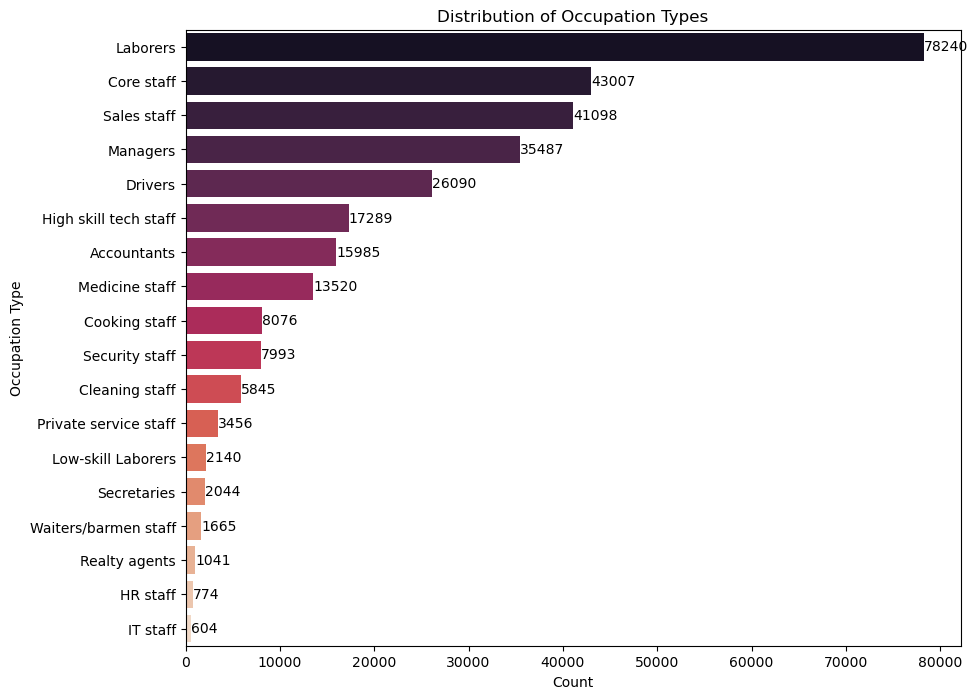

In [406]:
plt.figure(figsize=(10, 8))

sns.barplot(data=application,
            y=application['Occupy'].value_counts().index,
            x=application['Occupy'].value_counts().values,
            palette='rocket')

ax = plt.gca()
for i, v in enumerate(application['Occupy'].value_counts().values):
    ax.text(v , i, str(v), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.title('Distribution of Occupation Types')

plt.show()

### application Columns Null값 'not_specified'로 채워주기

In [407]:
application['Occupy'].fillna('not_specified',inplace=True)

In [408]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             438557 non-null  int64  
 1   Gender         438557 non-null  object 
 2   Car            438557 non-null  object 
 3   Reality        438557 non-null  object 
 4   ChildNo        438557 non-null  int64  
 5   Income         438557 non-null  float64
 6   IncomeType     438557 non-null  object 
 7   Edutype        438557 non-null  object 
 8   FamilyType     438557 non-null  object 
 9   HouseType      438557 non-null  object 
 10  DAYS_BIRTH     438557 non-null  int64  
 11  DAYS_EMPLOYED  438557 non-null  int64  
 12  FLAG_MOBIL     438557 non-null  int64  
 13  Wkphone        438557 non-null  int64  
 14  Phone          438557 non-null  int64  
 15  Email          438557 non-null  int64  
 16  Occupy         438557 non-null  object 
 17  FamilySize     438557 non-nul

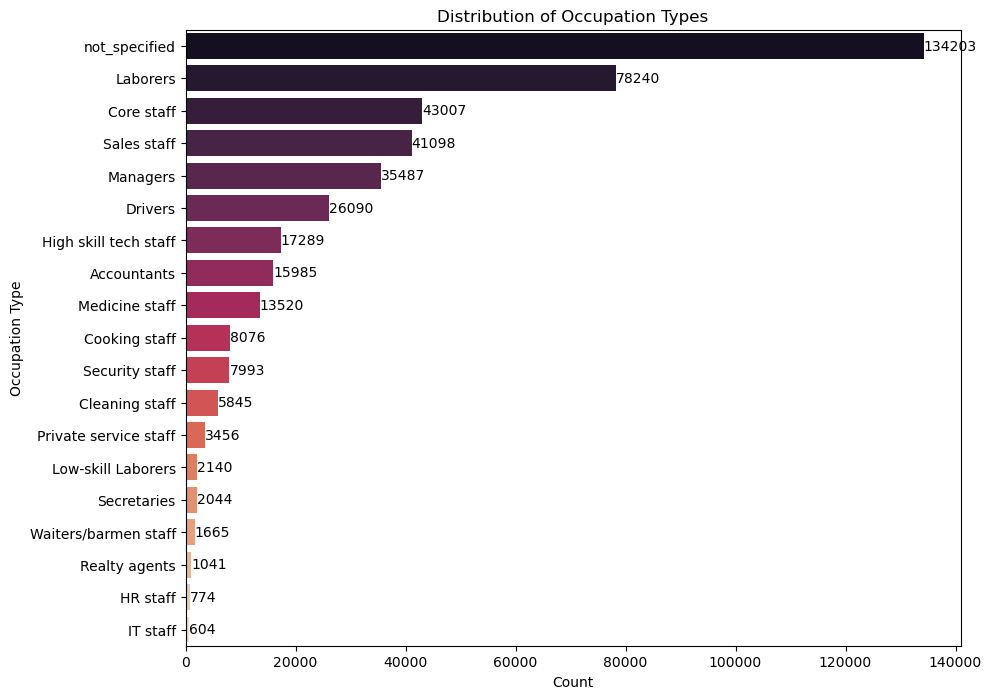

In [409]:
plt.figure(figsize=(10, 8))

sns.barplot(data=application,
            y=application['Occupy'].value_counts().index,
            x=application['Occupy'].value_counts().values,
            palette='rocket')

ax = plt.gca()
for i, v in enumerate(application['Occupy'].value_counts().values):
    ax.text(v , i, str(v), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.title('Distribution of Occupation Types')

plt.show()

In [410]:
application['Occupy'] = application['Occupy'].map({'not_specified': 0, 'Security staff': 1, 'Sales staff': 1, 'Accountants': 1,
                                                    'Laborers': 1, 'Managers': 1, 'Drivers': 1, 'Core staff': 1,
                                                    'High skill tech staff': 1, 'Cleaning staff': 1, 'Private service staff': 1,
                                                    'Cooking staff': 1, 'Low-skill Laborers': 1, 'Medicine staff': 1,
                                                    'Secretaries': 1, 'Waiters/barmen staff': 1, 'HR staff': 1, 'Realty agents': 1,
                                                    'IT staff': 1})

In [411]:
application['Occupy'].value_counts()

Occupy
1    304354
0    134203
Name: count, dtype: int64

### credit 데이터 살펴보기

In [412]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [413]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [414]:
credit['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

### credit STATUS 컬럼 mapping

In [415]:
credit['STATUS'] = credit['STATUS'].map({'X': 0, 'C': 0, '0': 0, '1': 1, '2': 2,'3': 3, '4': 4, '5': 5})

In [416]:
credit['STATUS'].value_counts()

STATUS
0    1034381
1      11090
5       1693
2        868
3        320
4        223
Name: count, dtype: int64

### group화 시키기

In [12]:
information = credit.groupby('ID').agg({'MONTHS_BALANCE': 'count', 'STATUS': 'sum'})
information.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,4,0
5001712,19,0
5001713,22,0
5001714,15,0
5001715,60,0


In [418]:
information.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45985 entries, 5001711 to 5150487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   MONTHS_BALANCE  45985 non-null  int64
 1   STATUS          45985 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB


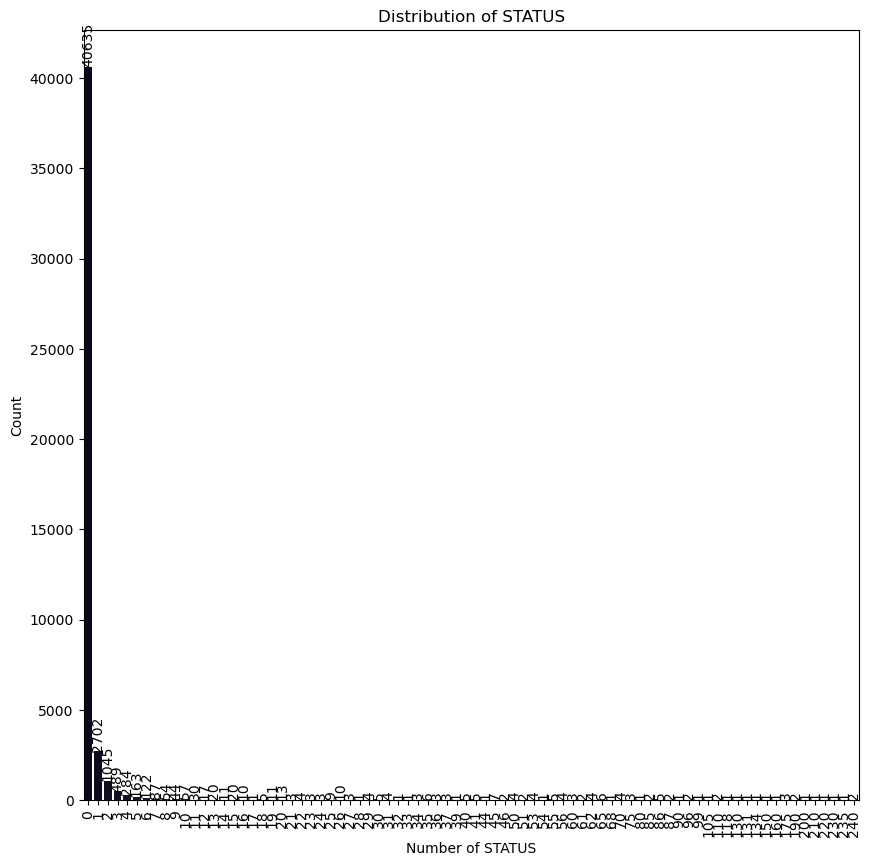

In [419]:
num = information['STATUS'].value_counts().values
label = information['STATUS'].value_counts().index
total = len(application)
plt.figure(figsize=(10,10))
ax=sns.barplot(data=information, x=label, y=num, palette='rocket')
ax.bar_label(ax.containers[0], label_type='edge', rotation=90)
for p in ax.patches:
    height = p.get_height()

ax.set_ylabel("Count")
ax.set_xlabel("Number of STATUS")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_title("Distribution of STATUS")

plt.show()

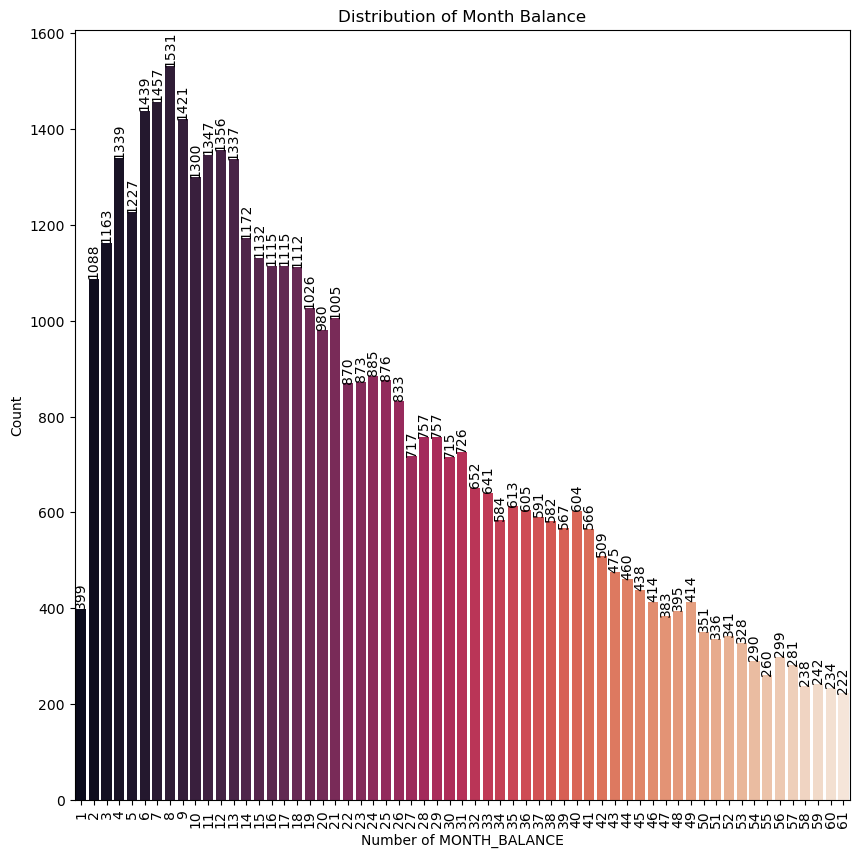

In [420]:
num = information['MONTHS_BALANCE'].value_counts().values
label = information['MONTHS_BALANCE'].value_counts().index
total = len(application)
plt.figure(figsize=(10,10))
ax=sns.barplot(data=information, x=label, y=num, palette='rocket')
ax.bar_label(ax.containers[0], label_type='edge', rotation=90)
for p in ax.patches:
    height = p.get_height()

ax.set_ylabel("Count")
ax.set_xlabel("Number of MONTH_BALANCE")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_title("Distribution of Month Balance")

plt.show()

### Good, Bad 나누기

In [421]:
merge_df = pd.merge(application, information, on='ID')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36457 non-null  int64  
 1   Gender          36457 non-null  object 
 2   Car             36457 non-null  object 
 3   Reality         36457 non-null  object 
 4   ChildNo         36457 non-null  int64  
 5   Income          36457 non-null  float64
 6   IncomeType      36457 non-null  object 
 7   Edutype         36457 non-null  object 
 8   FamilyType      36457 non-null  object 
 9   HouseType       36457 non-null  object 
 10  DAYS_BIRTH      36457 non-null  int64  
 11  DAYS_EMPLOYED   36457 non-null  int64  
 12  FLAG_MOBIL      36457 non-null  int64  
 13  Wkphone         36457 non-null  int64  
 14  Phone           36457 non-null  int64  
 15  Email           36457 non-null  int64  
 16  Occupy          36457 non-null  int64  
 17  FamilySize      36457 non-null 

In [422]:
merge_df['isBad'] = 'Bad'
merge_df['isBad'][(merge_df['STATUS'] == 0) & (merge_df['MONTHS_BALANCE'] >= 24) & (merge_df['Occupy'] == 1)] = 'Good'

In [424]:
merge_df['isBad'].value_counts()

isBad
Bad     28358
Good     8099
Name: count, dtype: int64

### Good, Bad 나누기

### Gender Distribution

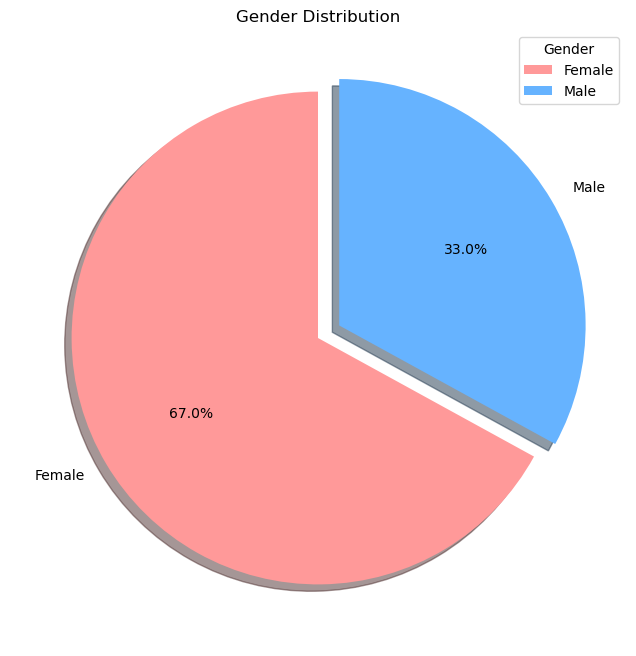

In [453]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)
plt.pie(x=merge_df['Gender'].value_counts().values, labels=['Female', 'Male'],
        autopct='%.1f%%', startangle=90, explode=explode, colors=colors, shadow=True)
plt.legend(title='Gender', loc='upper right')
plt.title('Gender Distribution')
plt.show()

### Car Ownership

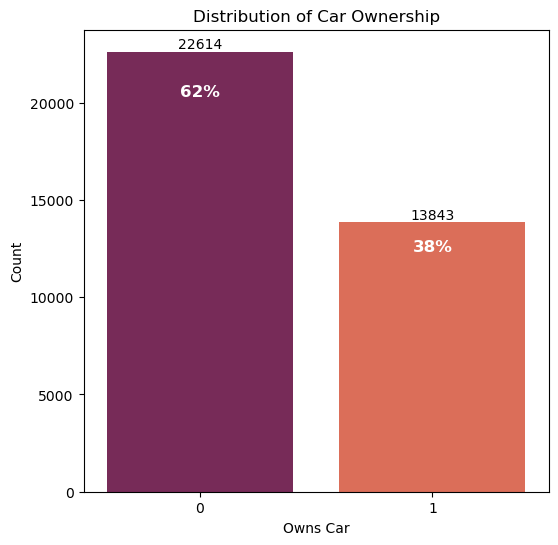

In [454]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=merge_df, y= merge_df['Car'].value_counts().values, 
                 x=merge_df['Car'].value_counts().index, palette='rocket')
total = len(merge_df)
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.0%}',
                (p.get_x() + p.get_width() / 2, height / 1.1),
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    
ax.set_xlabel('Owns Car')
ax.set_ylabel('Count')

ax.set_title('Distribution of Car Ownership')

plt.show()

### Number of Children Distribution

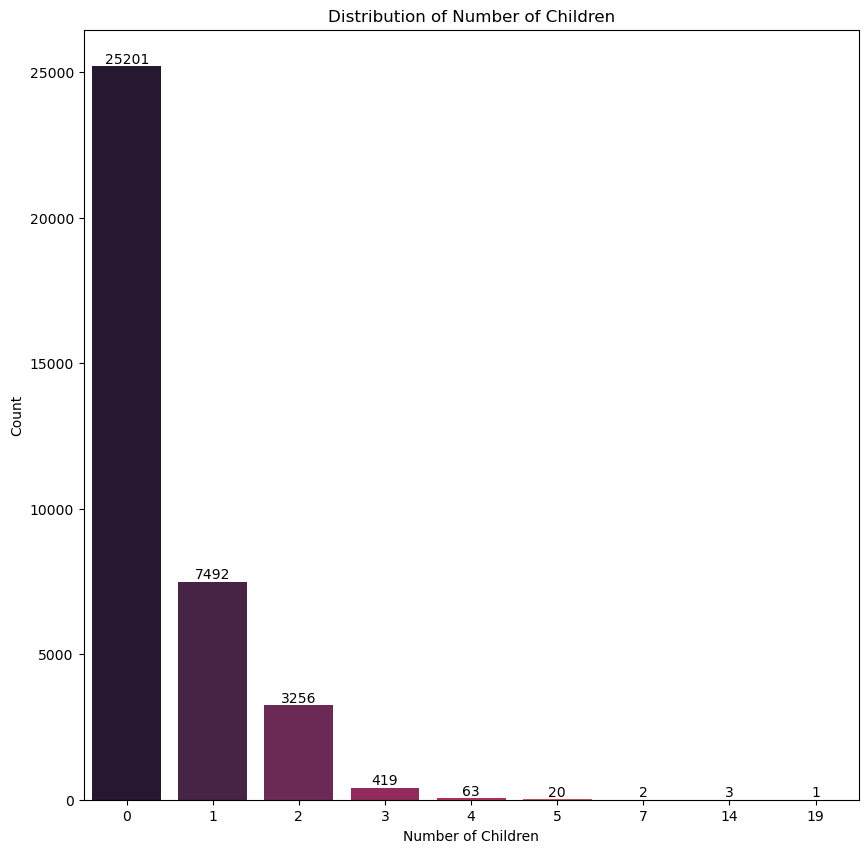

In [455]:
num = merge_df['ChildNo'].value_counts().values
label = merge_df['ChildNo'].value_counts().index
total = len(merge_df)
plt.figure(figsize=(10,10))
ax=sns.barplot(data=merge_df, x=label, y=num, palette='rocket')
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()

ax.set_ylabel("Count")
ax.set_xlabel("Number of Children")

ax.set_title("Distribution of Number of Children")

plt.show()

### Income Distribution

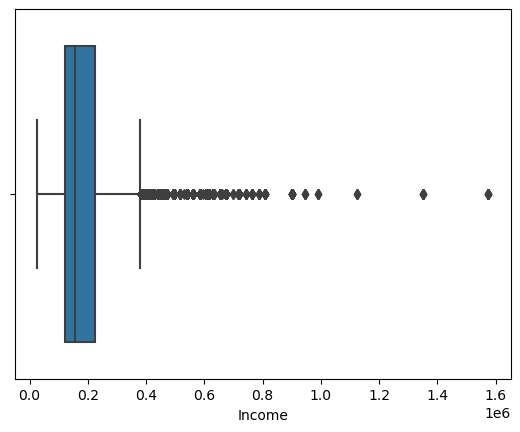

In [456]:
sns.boxplot(x='Income', data=merge_df);

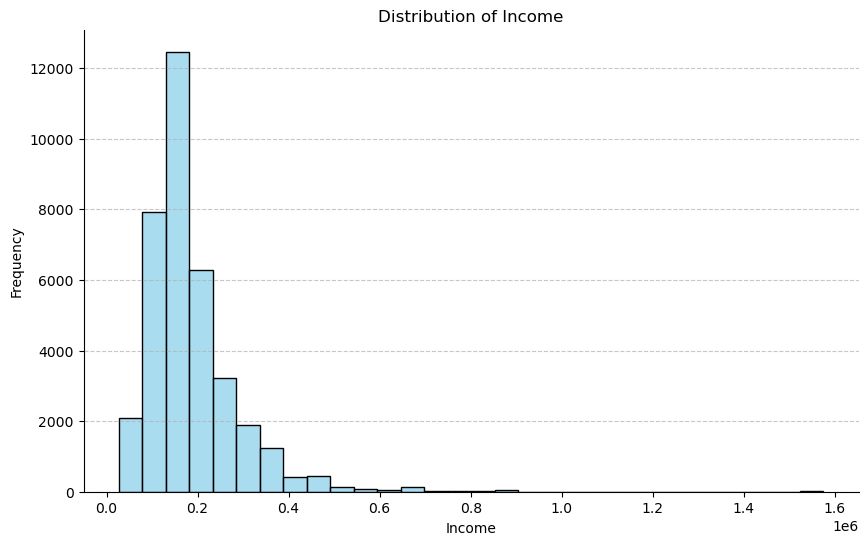

In [460]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=merge_df[merge_df['Income'] <= 1575000], 
                  x='Income', bins=30, color='skyblue', 
                  edgecolor='black', alpha=0.7)

ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [464]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=merge_df, x=merge_df['Edutype'].value_counts().values, 
            y=merge_df['Edutype'].value_counts().index, ax=ax[0, 0],palette='rocket')

for i, v in enumerate(merge_df['Edutype'].value_counts().values):
    ax[0, 0].text(v , i, str(v), color='black', va='center')

ax[0, 0].set_title('Education Type')

sns.barplot(data=merge_df, x=merge_df['FamilyType'].value_counts().values, 
            y=merge_df['FamilyType'].value_counts().index, ax=ax[0, 1],palette='rocket')

for i, v in enumerate(merge_df['FamilyType'].value_counts().values):
    ax[0, 1].text(v , i, str(v), color='black', va='center')

ax[0, 1].set_title('Family Status')

sns.barplot(data=merge_df, x=merge_df['HouseType'].value_counts().values, 
            y=merge_df['HouseType'].value_counts().index, ax=ax[1, 0],palette='rocket_r')

for i, v in enumerate(merge_df['HouseType'].value_counts().values):
    ax[1, 0].text(v , i, str(v), color='black', va='center')

ax[1, 0].set_title('Housing Type')

sns.barplot(data=merge_df, x=merge_df['IncomeType'].value_counts().values, 
            y=merge_df['IncomeType'].value_counts().index, ax=ax[1, 1],palette='rocket')

for i, v in enumerate(merge_df['IncomeType'].value_counts().values):
    ax[1, 1].text(v , i, str(v), color='black', va='center')
    
ax[1, 1].set_title('Income Type')

plt.tight_layout()
plt.show()

ValueError: Image size of 1911107x680 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x800 with 4 Axes>

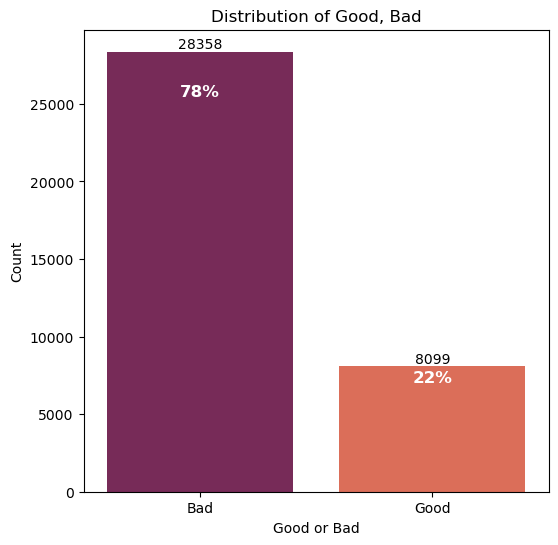

In [448]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=merge_df, y= merge_df['isBad'].value_counts().values, 
                 x=merge_df['isBad'].value_counts().index, palette='rocket')
total = len(merge_df)
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.0%}',
                (p.get_x() + p.get_width() / 2, height / 1.1),
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    
ax.set_xlabel('Good or Bad')
ax.set_ylabel('Count')

ax.set_title('Distribution of Good, Bad')

plt.show()

In [449]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36457 non-null  int64  
 1   Gender          36457 non-null  object 
 2   Car             36457 non-null  object 
 3   Reality         36457 non-null  object 
 4   ChildNo         36457 non-null  int64  
 5   Income          36457 non-null  float64
 6   IncomeType      36457 non-null  object 
 7   Edutype         36457 non-null  object 
 8   FamilyType      36457 non-null  object 
 9   HouseType       36457 non-null  object 
 10  DAYS_BIRTH      36457 non-null  int64  
 11  DAYS_EMPLOYED   36457 non-null  int64  
 12  FLAG_MOBIL      36457 non-null  int64  
 13  Wkphone         36457 non-null  int64  
 14  Phone           36457 non-null  int64  
 15  Email           36457 non-null  int64  
 16  Occupy          36457 non-null  int64  
 17  FamilySize      36457 non-null 

In [465]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encoder = ['Gender', 'Car', 'Reality', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'isBad']

for col in columns_to_encoder:
    merge_df[col] = le.fit_transform(merge_df[col])

merge_df.head()

,ID,Gender,Car,Reality,ChildNo,Income,IncomeType,Edutype,FamilyType,HouseType,...,DAYS_EMPLOYED,FLAG_MOBIL,Wkphone,Phone,Email,Occupy,FamilySize,MONTHS_BALANCE,STATUS,isBad
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,-4542,1,1,0,0,0,2.0,16,1,0
1,5008805,1,1,1,0,427500.0,4,1,0,4,...,-4542,1,1,0,0,0,2.0,15,1,0
2,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,1,2.0,30,0,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,...,-3051,1,0,1,1,1,1.0,5,0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,...,-3051,1,0,1,1,1,1.0,5,0,0


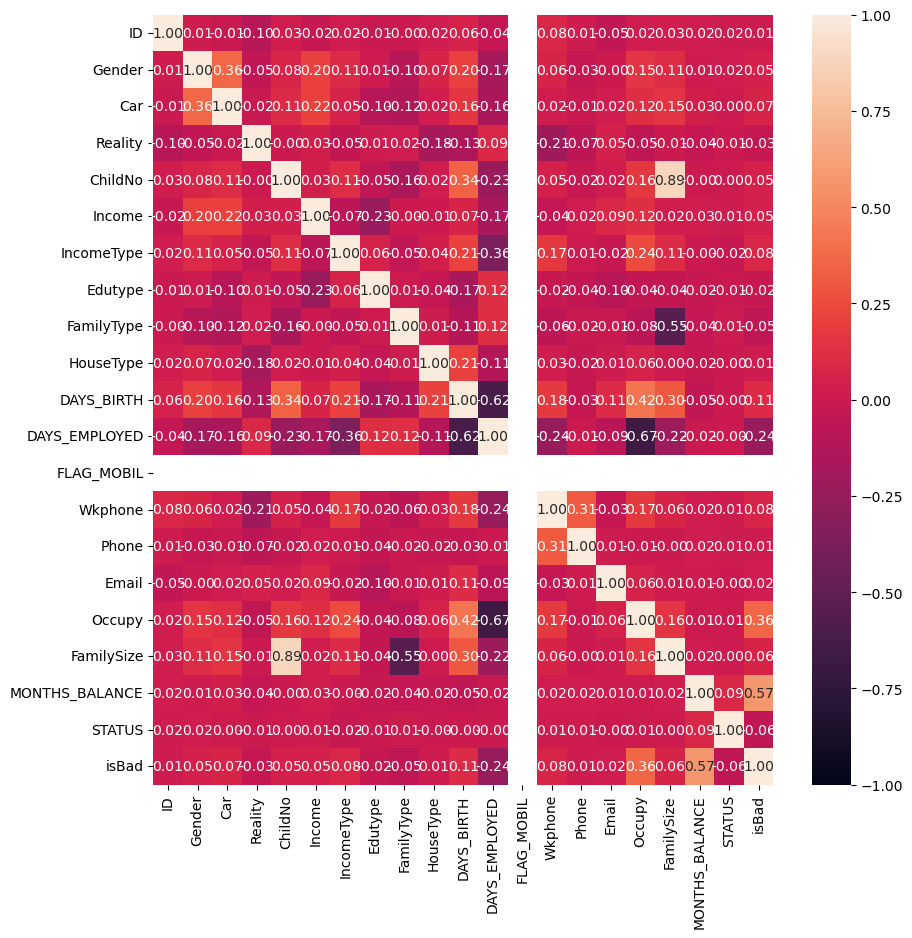

In [466]:
plt.figure(figsize=(10, 10))
sns.heatmap(merge_df.corr(), cmap='rocket', fmt='.2f', annot=True, vmin=-1, vmax=1);

In [ ]:
from sklearn.model_selection import train_test_split

X = merge_df.drop(columns=['ID', 'MONTHS_BALANCE','isBad'])
y = merge_df['isBad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

In [30]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('=============')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

In [31]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=17, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[5655    0]
 [1637    0]]
Accuracy: 0.7755, Precision: 0.0000
Recall: 0.0000, F1: 0.0000, AUC: 0.5000
CPU times: total: 62.5 ms
Wall time: 137 ms


In [ ]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=17, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[5654    1]
 [1635    2]]
Accuracy: 0.7756, Precision: 0.6667
Recall: 0.0012, F1: 0.0024, AUC: 0.5005
CPU times: total: 46.9 ms
Wall time: 59.1 ms


In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=17, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[5071  585]
 [ 793  843]]
Accuracy: 0.8110, Precision: 0.5903
Recall: 0.5153, F1: 0.5503, AUC: 0.7059
CPU times: total: 5.36 s
Wall time: 1.3 s


In [ ]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=17, n_jobs=-1, n_estimators=1000, 
                          num_leaves=64, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 6462, number of negative: 22703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 29165, number of used features: 17
=> confusion matrix
[[5033  622]
 [ 783  854]]
Accuracy: 0.8073, Precision: 0.5786
Recall: 0.5217, F1: 0.5487, AUC: 0.7058
CPU times: total: 13.5 s
Wall time: 3.78 s


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=17)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((29165, 18), (29165,))

In [ ]:
X_train_over.shape, y_train_over.shape

((45406, 18), (45406,))

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=17, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train_over, y_train_over)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[4786  869]
 [ 568 1069]]
Accuracy: 0.8029, Precision: 0.5516
Recall: 0.6530, F1: 0.5980, AUC: 0.7497
CPU times: total: 8.84 s
Wall time: 2.37 s


In [ ]:
merge_df.head()

,ID,Gender,Car,Reality,ChildNo,Income,IncomeType,Edutype,FamilyType,HouseType,...,DAYS_EMPLOYED,FLAG_MOBIL,Wkphone,Phone,Email,Occupy,FamilySize,MONTHS_BALANCE,STATUS,isBad
0,5008804,1,1,1,-0.579661,2.365845,4,1,0,4,...,-4542,1,1,0,0,0,-0.217680,16,1,0
1,5008805,1,1,1,-0.579661,2.365845,4,1,0,4,...,-4542,1,1,0,0,0,-0.217680,15,1,0
2,5008806,1,1,1,-0.579661,-0.728827,4,4,1,1,...,-1134,1,0,0,0,1,-0.217680,30,0,1
3,5008808,0,0,1,-0.579661,0.818509,0,4,3,1,...,-3051,1,0,1,1,1,-1.314564,5,0,0
4,5008809,0,0,1,-0.579661,0.818509,0,4,3,1,...,-3051,1,0,1,1,1,-1.314564,5,0,0


In [ ]:
merge_df.to_csv('merge_df.csv', index=False)

# 중복된 데이터 제거

In [19]:
application = pd.read_csv('../data/application_record.csv')
credit = pd.read_csv('../data/credit_record.csv')

In [20]:
application.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Car', 'FLAG_OWN_REALTY': 'Reality',
                                'CNT_CHILDREN': 'ChildNo', 'AMT_INCOME_TOTAL': 'Income',
                                'NAME_EDUCATION_TYPE': 'Edutype', 'NAME_FAMILY_STATUS': 'FamilyType',
                                'NAME_HOUSING_TYPE': 'HouseType', 'FLAG_EMAIL': 'Email',
                                'NAME_INCOME_TYPE': 'IncomeType', 'FLAG_WORK_PHONE': 'Wkphone',
                                'FLAG_PHONE': 'Phone', 'CNT_FAM_MEMBERS': 'FamilySize',
                                'OCCUPATION_TYPE': 'Occupy'}, inplace=True)

In [21]:
application_unique = application.drop_duplicates(subset=['Gender', 'Car', 'Reality', 'ChildNo', 'Income', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'Wkphone', 'Phone', 'Email', 'Occupy', 'FamilySize'], keep='first')

In [44]:
print('application :', len(application['ID']))
print('credit :',len(credit['ID']))
print('intersection :',len(set(application_unique['ID']).intersection(set(credit['ID']))))

application : 438557
credit : 1048575
intersection : 9709


### Null값 채워주기

In [45]:
application_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90085 entries, 0 to 438553
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             90085 non-null  int64  
 1   Gender         90085 non-null  object 
 2   Car            90085 non-null  object 
 3   Reality        90085 non-null  object 
 4   ChildNo        90085 non-null  int64  
 5   Income         90085 non-null  float64
 6   IncomeType     90085 non-null  object 
 7   Edutype        90085 non-null  object 
 8   FamilyType     90085 non-null  object 
 9   HouseType      90085 non-null  object 
 10  DAYS_BIRTH     90085 non-null  int64  
 11  DAYS_EMPLOYED  90085 non-null  int64  
 12  FLAG_MOBIL     90085 non-null  int64  
 13  Wkphone        90085 non-null  int64  
 14  Phone          90085 non-null  int64  
 15  Email          90085 non-null  int64  
 16  Occupy         62608 non-null  object 
 17  FamilySize     90085 non-null  float64
dtypes: float64

In [46]:
application_unique['Occupy'].fillna('not_specified',inplace=True)

In [47]:
information.head()

NameError: name 'information' is not defined

In [14]:
merge_df2 = pd.merge(application_unique, information, on='ID')
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9709 non-null   int64  
 1   Gender          9709 non-null   object 
 2   Car             9709 non-null   object 
 3   Reality         9709 non-null   object 
 4   ChildNo         9709 non-null   int64  
 5   Income          9709 non-null   float64
 6   IncomeType      9709 non-null   object 
 7   Edutype         9709 non-null   object 
 8   FamilyType      9709 non-null   object 
 9   HouseType       9709 non-null   object 
 10  DAYS_BIRTH      9709 non-null   int64  
 11  DAYS_EMPLOYED   9709 non-null   int64  
 12  FLAG_MOBIL      9709 non-null   int64  
 13  Wkphone         9709 non-null   int64  
 14  Phone           9709 non-null   int64  
 15  Email           9709 non-null   int64  
 16  Occupy          9709 non-null   object 
 17  FamilySize      9709 non-null   f

In [19]:
merge_df2['isBad'] = 'Bad'
merge_df2['isBad'][(merge_df2['STATUS'] == 0) & (merge_df2['MONTHS_BALANCE'] >= 12)] = 'Good'

In [20]:
merge_df2['isBad'].value_counts()

isBad
Good    5750
Bad     3959
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encoder = ['Gender', 'Car', 'Reality', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'Occupy','isBad']

for col in columns_to_encoder:
    merge_df2[col] = le.fit_transform(merge_df2[col])

merge_df2.head()

,ID,Gender,Car,Reality,ChildNo,Income,IncomeType,Edutype,FamilyType,HouseType,...,DAYS_EMPLOYED,FLAG_MOBIL,Wkphone,Phone,Email,Occupy,FamilySize,MONTHS_BALANCE,STATUS,isBad
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,-4542,1,1,0,0,18,2.0,16,1,0
1,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,16,2.0,30,0,1
2,5008808,0,0,1,0,270000.0,0,4,3,1,...,-3051,1,0,1,1,14,1.0,5,0,0
3,5008812,0,0,1,0,283500.0,1,1,2,1,...,365243,1,0,0,0,18,1.0,17,0,1
4,5008815,1,1,1,0,270000.0,4,1,1,1,...,-769,1,1,1,1,0,2.0,6,0,0


In [25]:
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9709 non-null   int64  
 1   Gender          9709 non-null   int64  
 2   Car             9709 non-null   int64  
 3   Reality         9709 non-null   int64  
 4   ChildNo         9709 non-null   int64  
 5   Income          9709 non-null   float64
 6   IncomeType      9709 non-null   int64  
 7   Edutype         9709 non-null   int64  
 8   FamilyType      9709 non-null   int64  
 9   HouseType       9709 non-null   int64  
 10  DAYS_BIRTH      9709 non-null   int64  
 11  DAYS_EMPLOYED   9709 non-null   int64  
 12  FLAG_MOBIL      9709 non-null   int64  
 13  Wkphone         9709 non-null   int64  
 14  Phone           9709 non-null   int64  
 15  Email           9709 non-null   int64  
 16  Occupy          9709 non-null   int32  
 17  FamilySize      9709 non-null   f

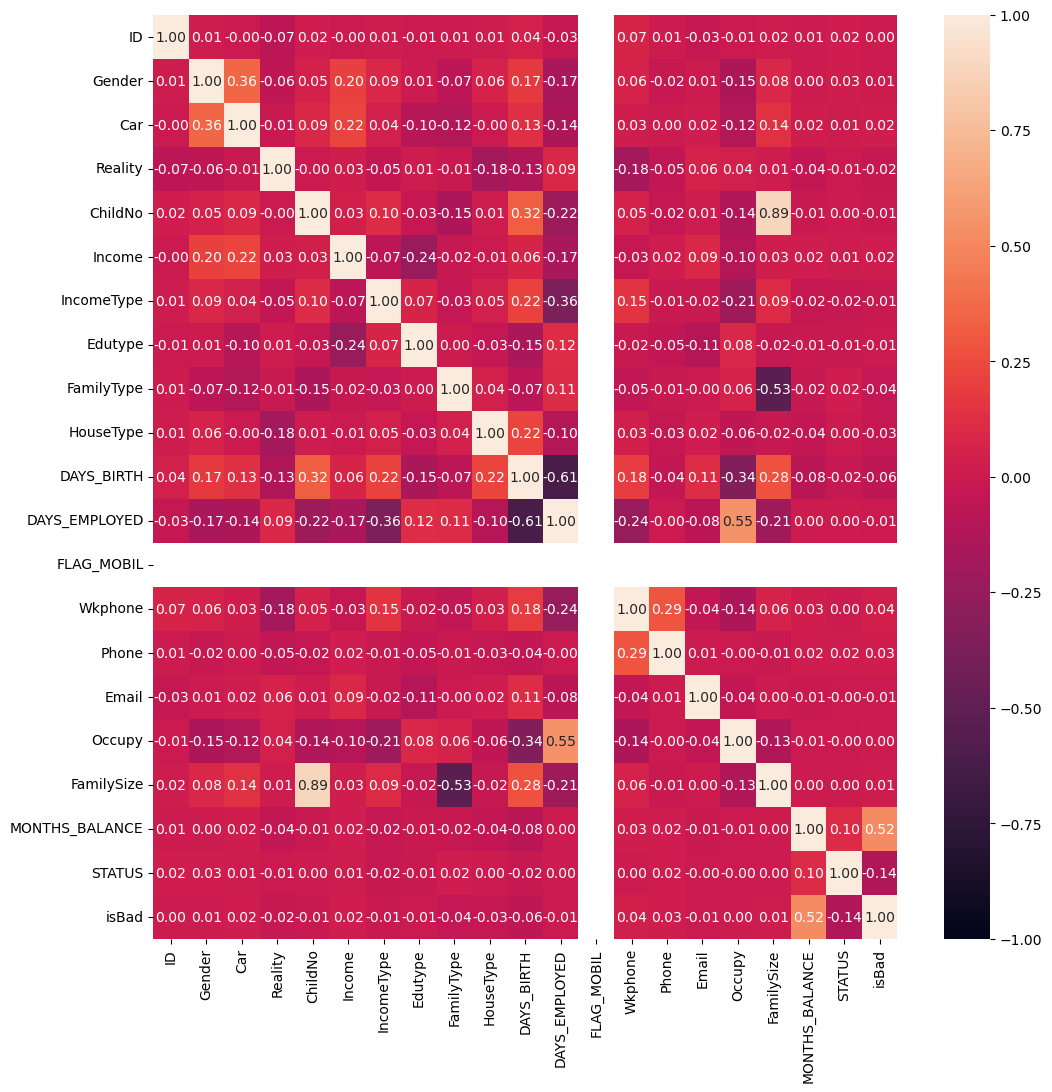

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(merge_df2.corr(), cmap='rocket', fmt='.2f', annot=True, vmin=-1, vmax=1);

In [28]:
from sklearn.model_selection import train_test_split

X = merge_df2.drop(columns=['ID', 'MONTHS_BALANCE','isBad'])
y = merge_df2['isBad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [32]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=17, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[ 338  492]
 [ 105 1007]]
Accuracy: 0.6926, Precision: 0.6718
Recall: 0.9056, F1: 0.7714, AUC: 0.6564
CPU times: total: 2.27 s
Wall time: 941 ms


In [33]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=17, n_jobs=-1, n_estimators=1000, 
                          num_leaves=64, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 4638, number of negative: 3129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 7767, number of used features: 17
=> confusion matrix
[[379 451]
 [212 900]]
Accuracy: 0.6586, Precision: 0.6662
Recall: 0.8094, F1: 0.7308, AUC: 0.6330
CPU times: total: 11.2 s
Wall time: 3.09 s


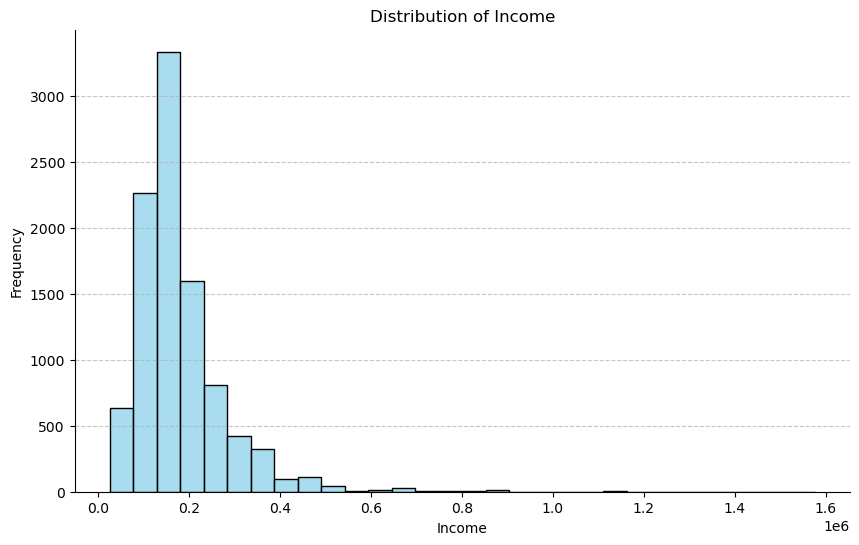

In [34]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=merge_df2[merge_df2['Income'] <= 1575000], 
                  x='Income', bins=30, color='skyblue', 
                  edgecolor='black', alpha=0.7)

ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

## Credit의 STATUS Mapping

In [3]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
credit['STATUS'] = credit['STATUS'].map({'X': 0, 'C': 7, '0': 6, '1': 5, '2': 4,'3': 3, '4': 2, '5': 1})
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,6
2,5001711,-2,6
3,5001711,-3,6
4,5001712,0,7
...,...,...,...
1048570,5150487,-25,7
1048571,5150487,-26,7
1048572,5150487,-27,7
1048573,5150487,-28,7


In [5]:
credit['STATUS'].value_counts()

STATUS
7    442031
6    383120
0    209230
5     11090
1      1693
4       868
3       320
2       223
Name: count, dtype: int64

### ID 별로 그룹화

In [6]:
agg = credit.groupby('ID').agg({'MONTHS_BALANCE': 'count', 'STATUS': 'sum'})
agg

,MONTHS_BALANCE,STATUS
ID,,
5001711,4,18
5001712,19,123
5001713,22,0
5001714,15,0
5001715,60,0
...,...,...
5150482,18,114
5150483,18,0
5150484,13,79


### Boxplot 그리기

<Axes: xlabel='STATUS'>

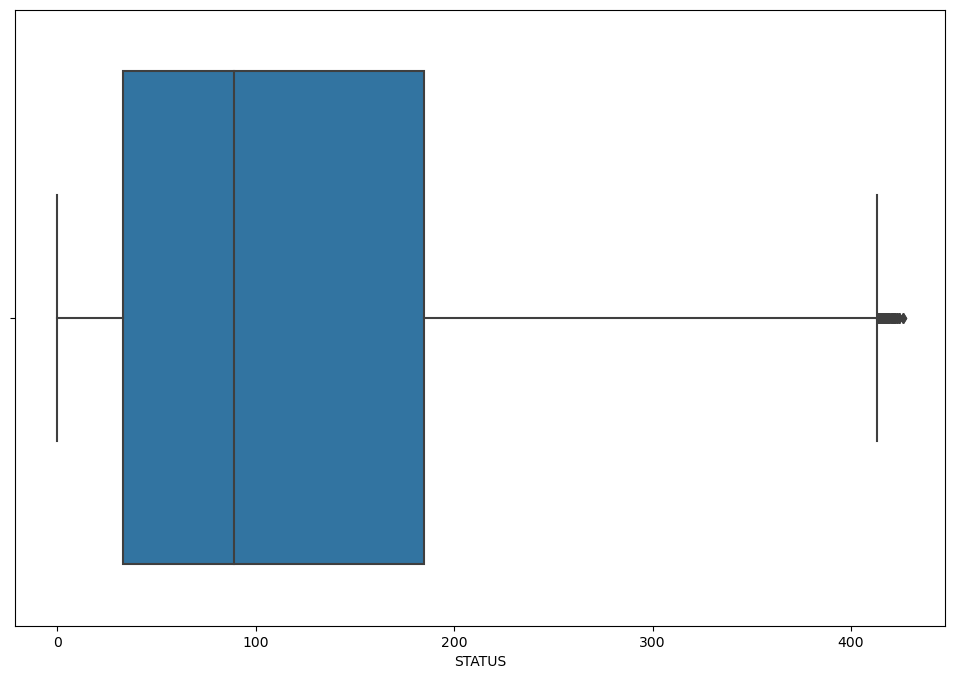

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = agg, x='STATUS')

### Scaling

In [8]:
agg['SCALE'] = np.nan
agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45985 entries, 5001711 to 5150487
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MONTHS_BALANCE  45985 non-null  int64  
 1   STATUS          45985 non-null  int64  
 2   SCALE           0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [9]:
agg['SCALE'] = agg['STATUS'] / agg['MONTHS_BALANCE']
agg

,MONTHS_BALANCE,STATUS,SCALE
ID,,,
5001711,4,18,4.500000
5001712,19,123,6.473684
5001713,22,0,0.000000
5001714,15,0,0.000000
5001715,60,0,0.000000
...,...,...,...
5150482,18,114,6.333333
5150483,18,0,0.000000
5150484,13,79,6.076923


<Axes: xlabel='SCALE'>

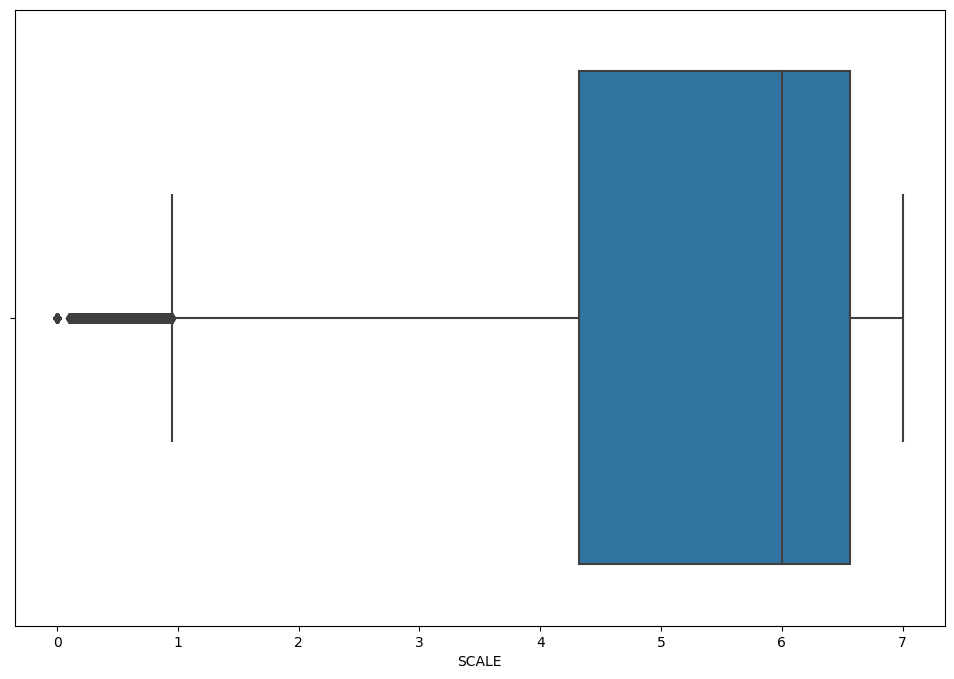

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = agg, x='SCALE')

<Axes: xlabel='SCALE', ylabel='Count'>

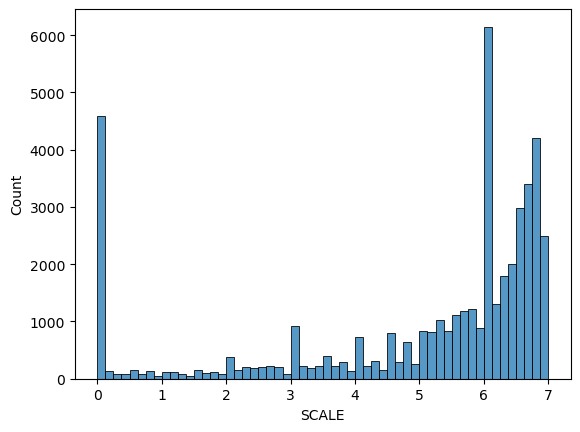

In [16]:
sns.histplot(data = agg, x='SCALE')

In [12]:
agg.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTHS_BALANCE,45985.0,22.802544,15.492771,1.0,10.00,19.0,34.000000,61.0
STATUS,45985.0,118.624725,105.140574,0.0,33.00,89.0,185.000000,426.0
SCALE,45985.0,5.008984,2.172335,0.0,4.32,6.0,6.565217,7.0


### Scaling 2

In [13]:
agg['SCALE2'] = np.nan
agg['SCALE2'] = agg['STATUS'] / (agg['MONTHS_BALANCE'] * 7)
agg.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTHS_BALANCE,45985.0,22.802544,15.492771,1.0,10.000000,19.000000,34.000000,61.0
STATUS,45985.0,118.624725,105.140574,0.0,33.000000,89.000000,185.000000,426.0
SCALE,45985.0,5.008984,2.172335,0.0,4.320000,6.000000,6.565217,7.0
SCALE2,45985.0,0.715569,0.310334,0.0,0.617143,0.857143,0.937888,1.0


<Axes: xlabel='SCALE2'>

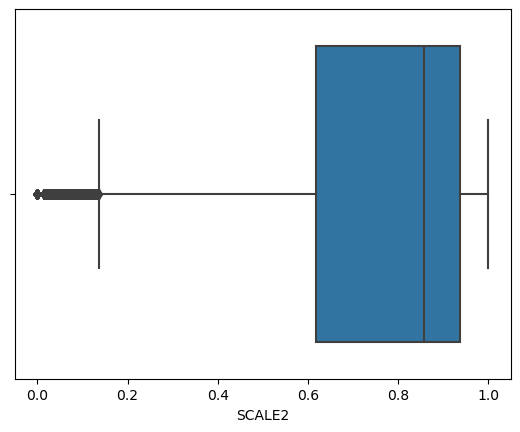

In [14]:
sns.boxplot(data = agg, x='SCALE2')

<Axes: xlabel='SCALE2', ylabel='Count'>

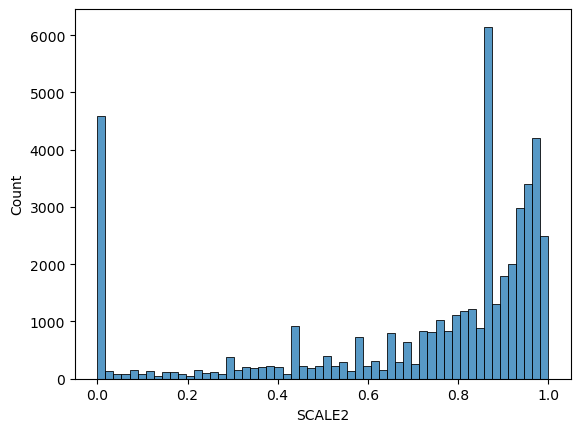

In [15]:
sns.histplot(data = agg, x='SCALE2')

#### 7을 곱해서 하던 그냥 기간만 나누던 결과는 똑같이 나온다..! 그렇다면 그냥 기간만 나눠서 하는 것이 더 나을 것 같다!

#### 그렇다면  Good, Bad를 어떻게 나눌 것인가?


In [17]:
agg.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTHS_BALANCE,45985.0,22.802544,15.492771,1.0,10.000000,19.000000,34.000000,61.0
STATUS,45985.0,118.624725,105.140574,0.0,33.000000,89.000000,185.000000,426.0
SCALE,45985.0,5.008984,2.172335,0.0,4.320000,6.000000,6.565217,7.0
SCALE2,45985.0,0.715569,0.310334,0.0,0.617143,0.857143,0.937888,1.0


#### 하위 25%가 4.32 밑이다.. 그렇다면 하위 25%를 Bad로 잡는 게 좋은가?

#### 일단 데이터를 다시 합쳐보자!

In [48]:
merge_df3 = pd.merge(application_unique, agg.drop(columns=['SCALE2'], axis=1), on='ID')
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9709 non-null   int64  
 1   Gender          9709 non-null   object 
 2   Car             9709 non-null   object 
 3   Reality         9709 non-null   object 
 4   ChildNo         9709 non-null   int64  
 5   Income          9709 non-null   float64
 6   IncomeType      9709 non-null   object 
 7   Edutype         9709 non-null   object 
 8   FamilyType      9709 non-null   object 
 9   HouseType       9709 non-null   object 
 10  DAYS_BIRTH      9709 non-null   int64  
 11  DAYS_EMPLOYED   9709 non-null   int64  
 12  FLAG_MOBIL      9709 non-null   int64  
 13  Wkphone         9709 non-null   int64  
 14  Phone           9709 non-null   int64  
 15  Email           9709 non-null   int64  
 16  Occupy          9709 non-null   object 
 17  FamilySize      9709 non-null   f

<Axes: xlabel='SCALE'>

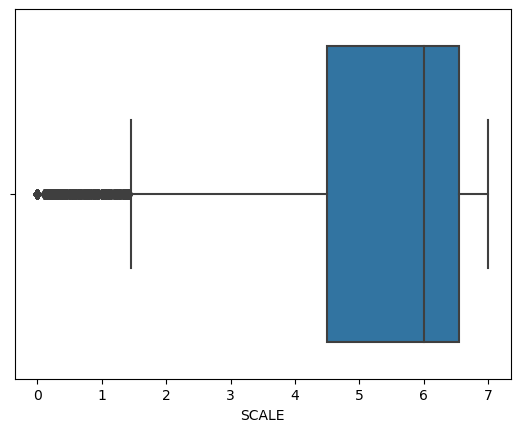

In [49]:
sns.boxplot(data=merge_df3, x='SCALE')

In [50]:
merge_df3.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5.076105e+06,40802.696053,5008804.0,5036955.0,5069449.0,5.112986e+06,5150479.0
ChildNo,9709.0,4.228036e-01,0.767019,0.0,0.0,0.0,1.000000e+00,19.0
Income,9709.0,1.812282e+05,99277.305097,27000.0,112500.0,157500.0,2.250000e+05,1575000.0
DAYS_BIRTH,9709.0,-1.599181e+04,4246.224468,-25152.0,-19565.0,-15611.0,-1.244000e+04,-7489.0
DAYS_EMPLOYED,9709.0,6.173285e+04,139656.322958,-15713.0,-2995.0,-1374.0,-3.390000e+02,365243.0
FLAG_MOBIL,9709.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.000000e+00,1.0
Wkphone,9709.0,2.174271e-01,0.412517,0.0,0.0,0.0,0.000000e+00,1.0
Phone,9709.0,2.876712e-01,0.452700,0.0,0.0,0.0,1.000000e+00,1.0
Email,9709.0,8.754764e-02,0.282650,0.0,0.0,0.0,0.000000e+00,1.0
FamilySize,9709.0,2.182614e+00,0.932918,1.0,2.0,2.0,3.000000e+00,20.0


#### 병합 후 다시 살펴보면 하위 25% 기준이 4.5이다.

In [51]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9709 non-null   int64  
 1   Gender          9709 non-null   object 
 2   Car             9709 non-null   object 
 3   Reality         9709 non-null   object 
 4   ChildNo         9709 non-null   int64  
 5   Income          9709 non-null   float64
 6   IncomeType      9709 non-null   object 
 7   Edutype         9709 non-null   object 
 8   FamilyType      9709 non-null   object 
 9   HouseType       9709 non-null   object 
 10  DAYS_BIRTH      9709 non-null   int64  
 11  DAYS_EMPLOYED   9709 non-null   int64  
 12  FLAG_MOBIL      9709 non-null   int64  
 13  Wkphone         9709 non-null   int64  
 14  Phone           9709 non-null   int64  
 15  Email           9709 non-null   int64  
 16  Occupy          9709 non-null   object 
 17  FamilySize      9709 non-null   f

In [53]:
merge_df3['isBad'] = 'Bad'

In [54]:
merge_df3['isBad'][merge_df3['SCALE'] >= 4.5] = 'Good'
merge_df3['isBad'].value_counts()

isBad
Good    7322
Bad     2387
Name: count, dtype: int64

#### Object 유형은 Gender, Car, Reality, Incomtype, Edutype, FamilyType, HouseType, Occupy

#### One-Hot Encoding

In [55]:
client = pd.get_dummies(merge_df3, columns=['Gender', 'Car', 'Reality', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'Occupy'])
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     9709 non-null   int64  
 1   ChildNo                                9709 non-null   int64  
 2   Income                                 9709 non-null   float64
 3   DAYS_BIRTH                             9709 non-null   int64  
 4   DAYS_EMPLOYED                          9709 non-null   int64  
 5   FLAG_MOBIL                             9709 non-null   int64  
 6   Wkphone                                9709 non-null   int64  
 7   Phone                                  9709 non-null   int64  
 8   Email                                  9709 non-null   int64  
 9   FamilySize                             9709 non-null   float64
 10  MONTHS_BALANCE                         9709 non-null   int64  
 11  STAT

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
client['isBad'] = le.fit_transform(client['isBad'])

client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     9709 non-null   int64  
 1   ChildNo                                9709 non-null   int64  
 2   Income                                 9709 non-null   float64
 3   DAYS_BIRTH                             9709 non-null   int64  
 4   DAYS_EMPLOYED                          9709 non-null   int64  
 5   FLAG_MOBIL                             9709 non-null   int64  
 6   Wkphone                                9709 non-null   int64  
 7   Phone                                  9709 non-null   int64  
 8   Email                                  9709 non-null   int64  
 9   FamilySize                             9709 non-null   float64
 10  MONTHS_BALANCE                         9709 non-null   int64  
 11  STAT

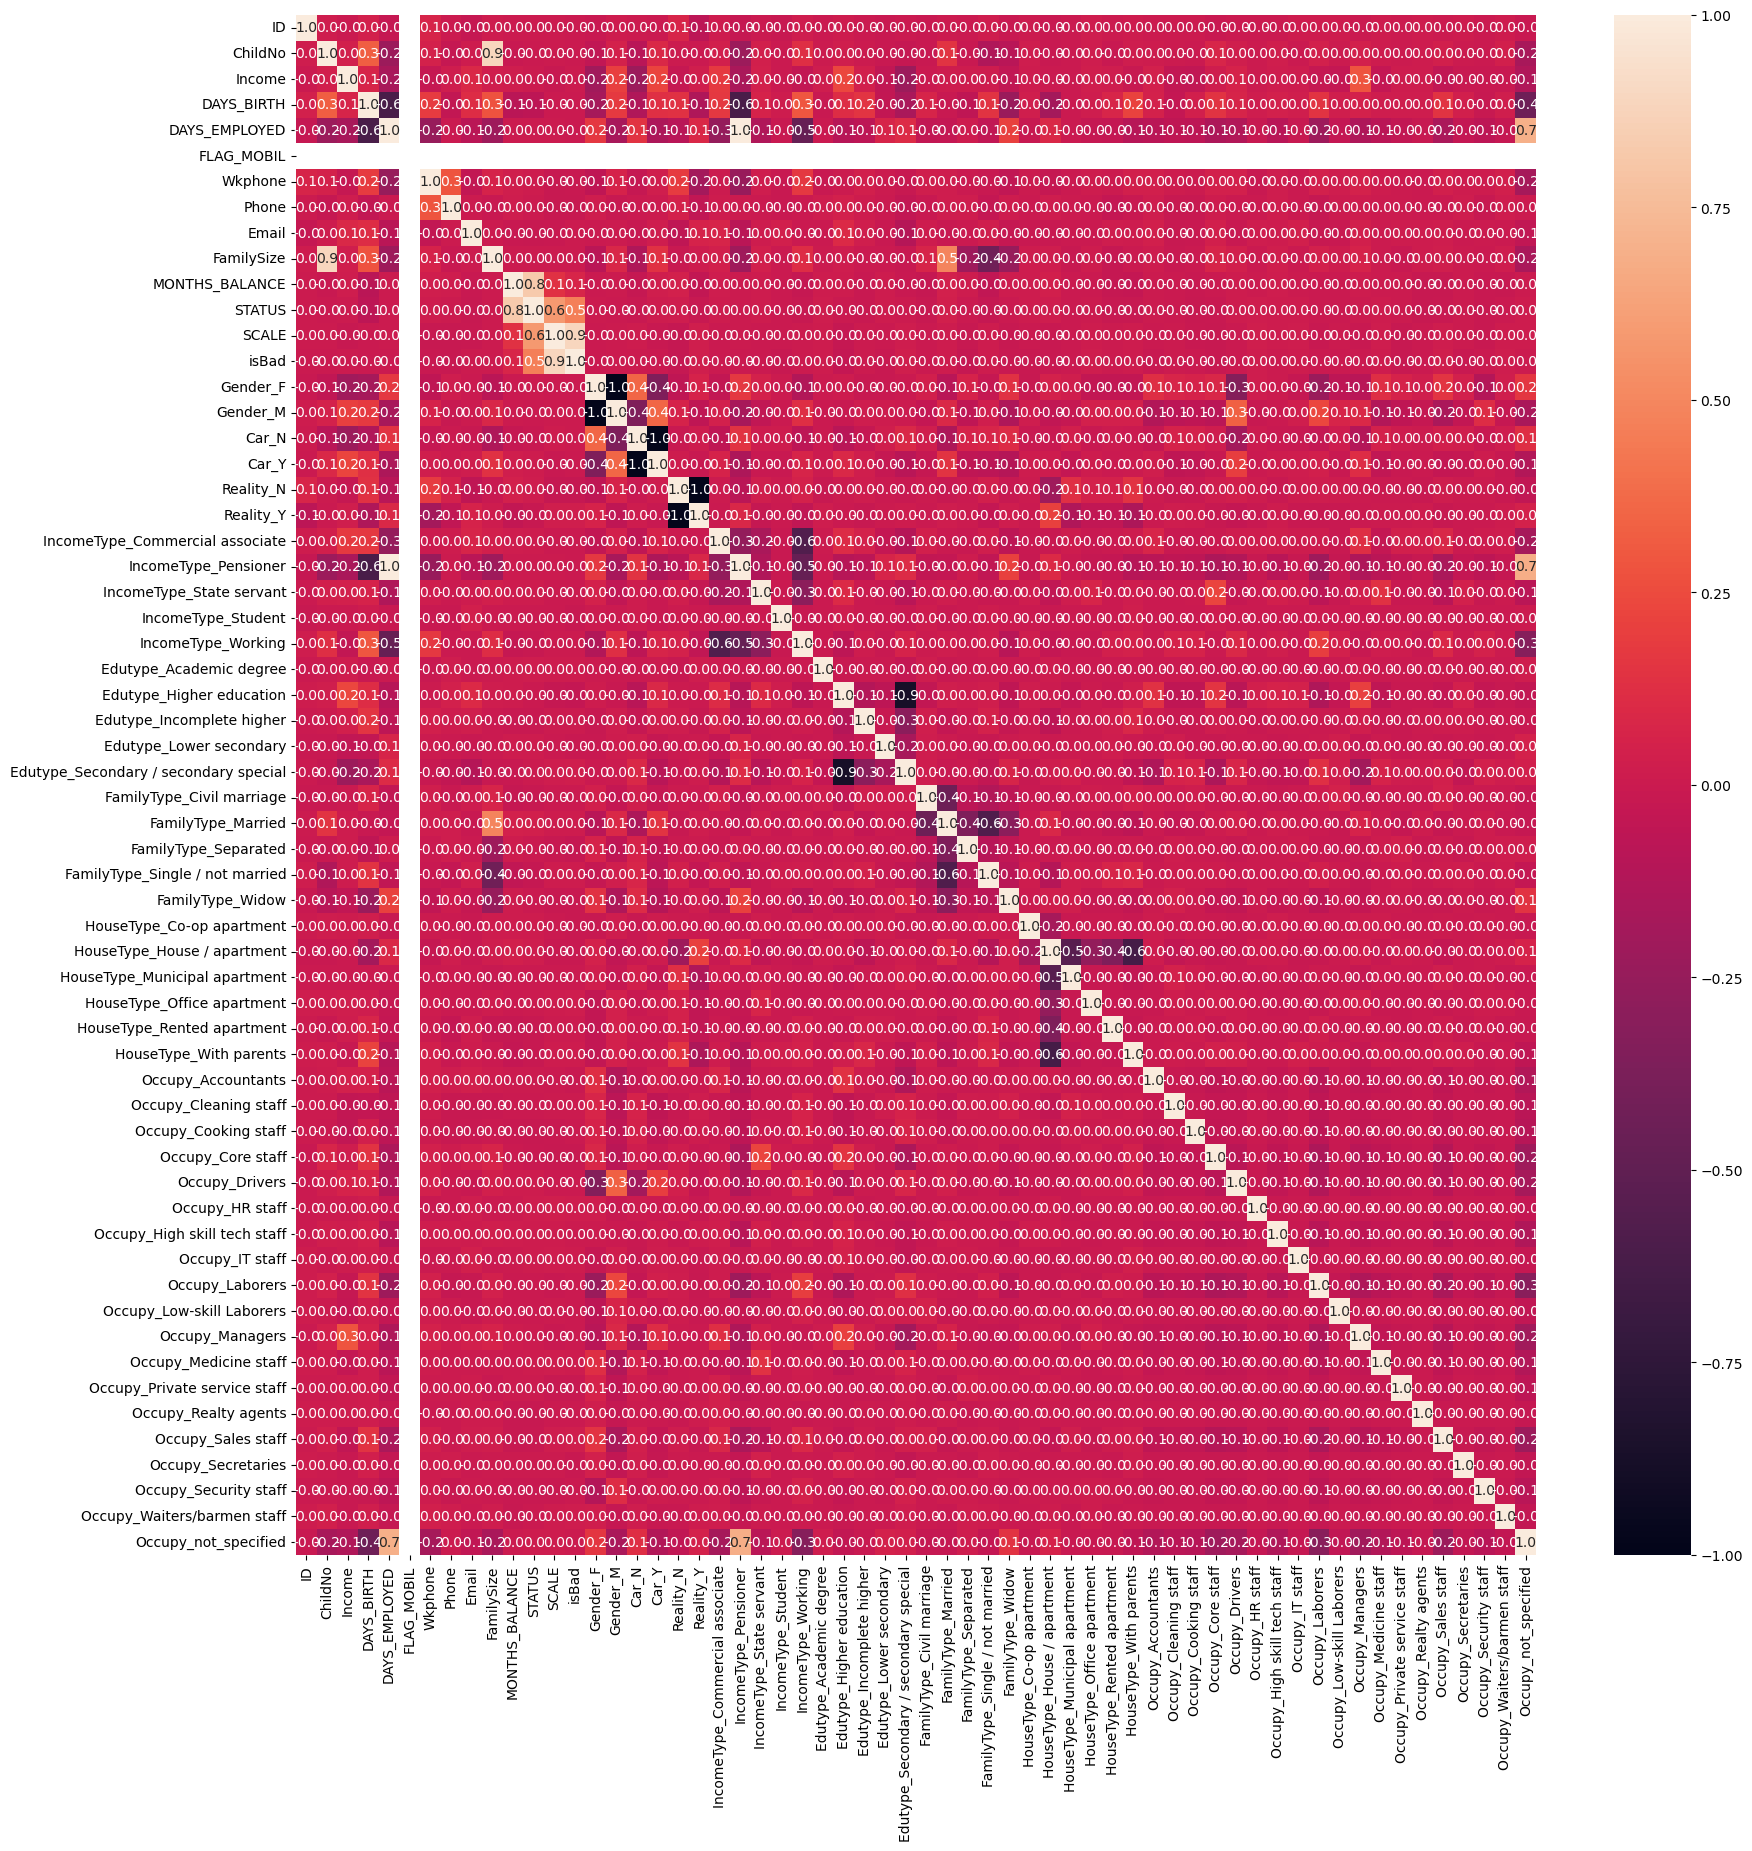

In [57]:
plt.figure(figsize=(20, 20))
sns.heatmap(client.corr(), cmap='rocket', fmt='.1f', annot=True, vmin=-1, vmax=1);

#### LabelEncoder

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encoder = ['Gender', 'Car', 'Reality', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'Occupy','isBad']

for col in columns_to_encoder:
    merge_df3[col] = le.fit_transform(merge_df3[col])

merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9709 non-null   int64  
 1   Gender          9709 non-null   int32  
 2   Car             9709 non-null   int32  
 3   Reality         9709 non-null   int32  
 4   ChildNo         9709 non-null   int64  
 5   Income          9709 non-null   float64
 6   IncomeType      9709 non-null   int32  
 7   Edutype         9709 non-null   int32  
 8   FamilyType      9709 non-null   int32  
 9   HouseType       9709 non-null   int32  
 10  DAYS_BIRTH      9709 non-null   int64  
 11  DAYS_EMPLOYED   9709 non-null   int64  
 12  FLAG_MOBIL      9709 non-null   int64  
 13  Wkphone         9709 non-null   int64  
 14  Phone           9709 non-null   int64  
 15  Email           9709 non-null   int64  
 16  Occupy          9709 non-null   int32  
 17  FamilySize      9709 non-null   f

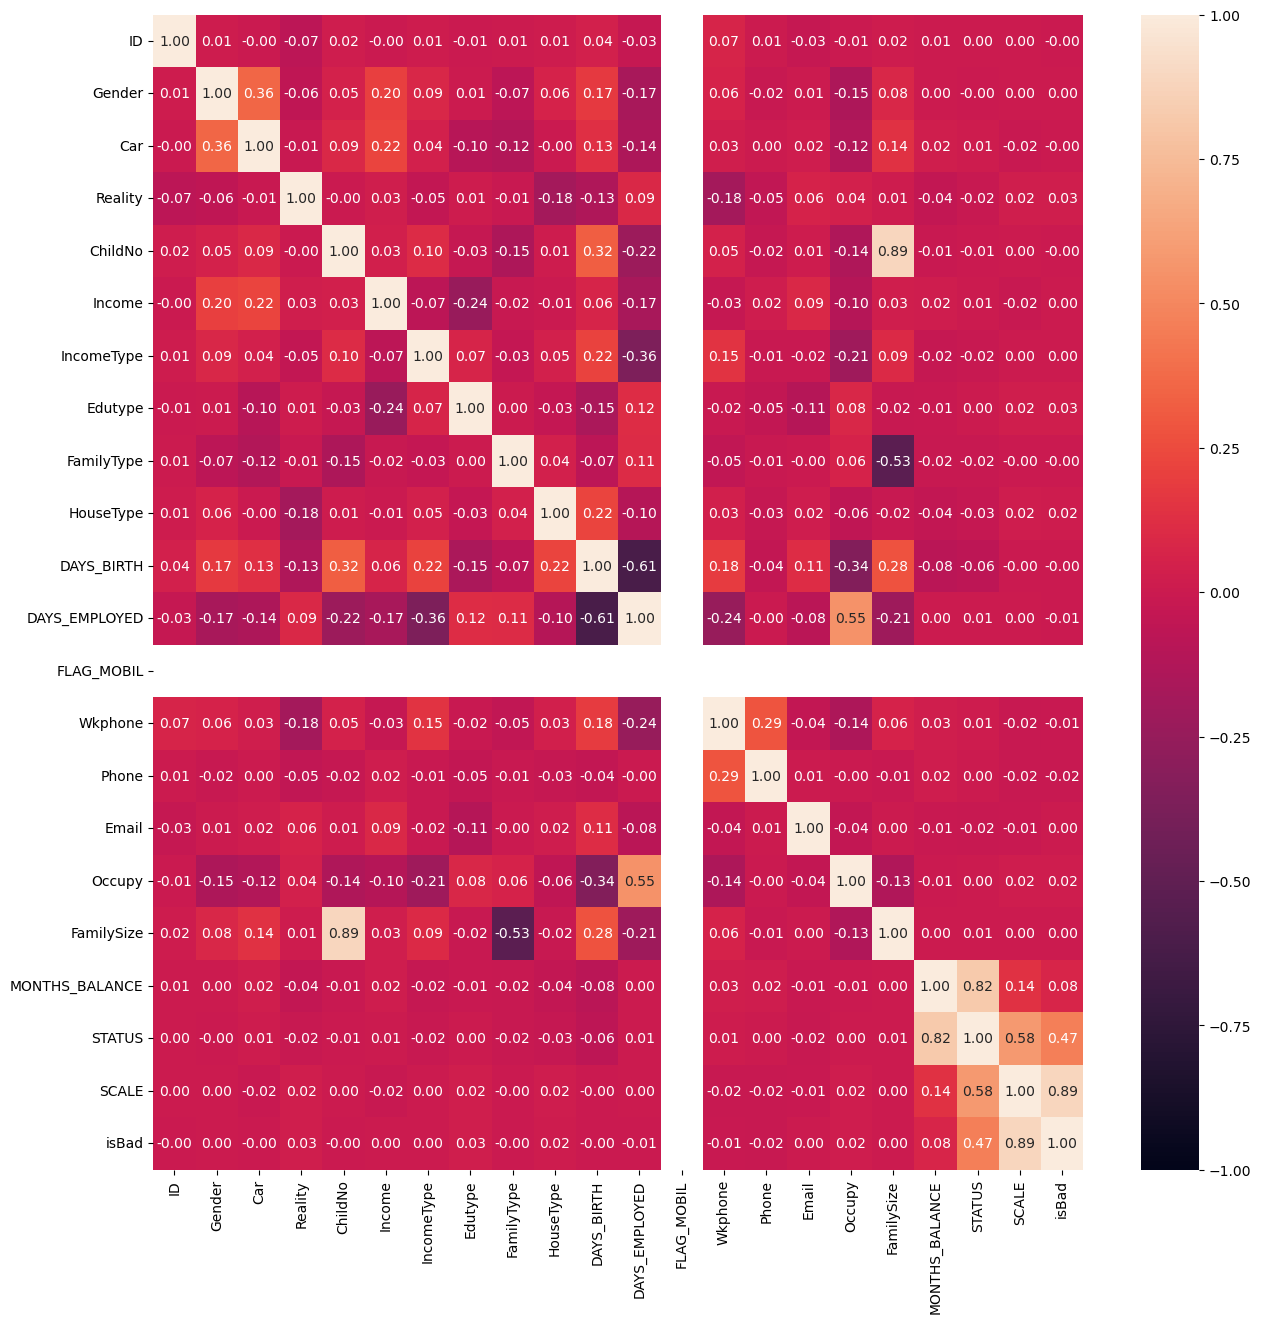

In [60]:
plt.figure(figsize=(15, 15))
sns.heatmap(merge_df3.corr(), cmap='rocket', fmt='.2f', annot=True, vmin=-1, vmax=1);